Title: To analyse the prevalence of the diabetes over the world and to analyse the diabetic hospitalisations data in US

Importing the libraries

In [2]:
library(tidyverse)
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings 
library(stringr) # to hand strings
library(rvest) # to make scraping easier
library(politeness) # (polite has been changed to politeness). politeness is the "polite" version of rvest
library(htmltab)
library(dplyr)
library(tidyr)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract


Attaching package: 'glue'

The following object is masked from 'package:dplyr':

    collapse

Loading required package: xml2

Attaching package: 'rvest'

The following object is masked from 'package:purrr':

    pluck

The following object is masked from 'package:readr':

    guess_encoding

politeness v0.2.4 successfully loaded. See ?politeness for help.


In [5]:
url_titles <- "http://www.who.int/diabetes/facts/world_figures/en/index1.html" # this is the base url from where the scraping starts
page_title <- read_html(url_titles)

In [6]:
page_title %>% typeof()
page_title %>% glimpse()

[1] "list"

List of 2
 $ node:<externalptr> 
 $ doc :<externalptr> 
 - attr(*, "class")= chr [1:2] "xml_document" "xml_node"


In [66]:
page_title %>%
 html_structure() 

<html>
  <head>
    <meta [http-equiv, content]>
    <meta [http-equiv, content]>
    <meta [name, content]>
    <script [src, type]>
    <script [src, type]>
    <title>
      {text}
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <script [type]>
      {cdata}
    <link [rel, href]>
    <link [rel, href]>
    <script [type, src]>
    <script [type, src]>
    {comment}
    <script [type, src]>
    <script [type, src]>
    <script [type, src]>
    <script [type, src]>
    <link [href, rel, type]>
    {comment}
    {comment}
    {comment}
    {comment}
    {comment}
    {comment}
    <link [rel, type, href]>
    <script [type, src]>
    <link [rel, type, href]>
    <script [type, src]>
    <script [type]>
      {cdata}
    {comment}
    <s

Scrape the table for AFRICA REGION

In [8]:
africa_table <- page_title %>%
html_nodes("table.tableData") %>% 
html_table(header=T)

In [9]:
africa_table

Country,2000,2030
Algeria,"426,000","1,203,000"
Angola,"51,000","140,000"
Benin,"87,000","266,000"
Botswana,"25,000","45,000"
Burkina Faso,"124,000","388,000"
Burundi,"26,000","72,000"
Cameroon,"70,000","171,000"
Cape Verde,"7,000","24,000"
Central African Republic,"18,000","38,000"
Chad,"97,000","269,000"


Converting the scraped table into a dataframe and renaming the dataframe as africa_df

In [10]:
africa_df <- as.data.frame(africa_table) 

In [11]:
africa_df %>% head()

Country,X2000,X2030
Algeria,"426,000","1,203,000"
Angola,"51,000","140,000"
Benin,"87,000","266,000"
Botswana,"25,000","45,000"
Burkina Faso,"124,000","388,000"
Burundi,"26,000","72,000"


Renaming the columns to the desired names

In [12]:
columns_wanted <- c("Country", "X2000", "X2030")
africa_df <- africa_df[columns_wanted]

In [13]:
colnames(africa_df) <- c("COUNTRY", "2000", "2030")

In [14]:
africa_df %>% head(5)

COUNTRY,2000,2030
Algeria,"426,000","1,203,000"
Angola,"51,000","140,000"
Benin,"87,000","266,000"
Botswana,"25,000","45,000"
Burkina Faso,"124,000","388,000"


Scrape the table for EASTERN MEDITERRANEAN REGION

In [15]:
#Scraping table from a webpage using xpath
url_titles_2 <- "http://www.who.int/diabetes/facts/world_figures/en/index2.html" # this is the base url from where the scraping starts
page_title_2 <- read_html(url_titles_2)
east_med_table <- page_title_2 %>%
html_nodes("table.tableData") %>% 
html_table(header=T)
east_med_table

Country,2000,2030
Afghanistan,"468,000","1,403,000"
Bahrain,"37,000","99,000"
Cyprus,"50,000","87,000"
Djibouti,"7,000","9,000"
Egypt,"2,623,000","6,726,000"
Islamic Republic of Iran,"2,103,000","6,421,000"
Iraq,"668,000","2,009,000"
Jordan,"195,000","680,000"
Kuwait,"104,000","319,000"
Lebanon,"146,000","378,000"


In [16]:
east_med_df <- as.data.frame(east_med_table) 
east_med_df %>% head()

Country,X2000,X2030
Afghanistan,"468,000","1,403,000"
Bahrain,"37,000","99,000"
Cyprus,"50,000","87,000"
Djibouti,"7,000","9,000"
Egypt,"2,623,000","6,726,000"
Islamic Republic of Iran,"2,103,000","6,421,000"


In [17]:
columns_wanted <- c("Country", "X2000", "X2030")
east_med_df <- east_med_df[columns_wanted]
colnames(east_med_df) <- c("COUNTRY", "2000", "2030")
east_med_df %>% head()

COUNTRY,2000,2030
Afghanistan,"468,000","1,403,000"
Bahrain,"37,000","99,000"
Cyprus,"50,000","87,000"
Djibouti,"7,000","9,000"
Egypt,"2,623,000","6,726,000"
Islamic Republic of Iran,"2,103,000","6,421,000"


Scrape the table for AMERICAS REGION

In [18]:
#Scraping table from a webpage using xpath
url_titles_3 <- "http://www.who.int/diabetes/facts/world_figures/en/index3.html" # this is the base url from where the scraping starts
page_title_3 <- read_html(url_titles_3)
americas_table <- page_title_3 %>%
html_nodes("table.tableData") %>% 
html_table(header=T)
americas_table

Country,2000,2030
Antigua and Barbuda,"3,000","5,000"
Argentina,"1,426,000","2,457,000"
Bahamas,"12,000","26,000"
Barbados,"11,000","22,000"
Belize,"5,000","15,000"
Bolivia,"207,000","562,000"
Brazil,"4,553,000","11,305,000"
Canada,"2,006,000","3,543,000"
Chile,"495,000","1,047,000"
Colombia,"883,000","2,425,000"


In [19]:
americas_df <- as.data.frame(americas_table) 
americas_df %>% head()

Country,X2000,X2030
Antigua and Barbuda,"3,000","5,000"
Argentina,"1,426,000","2,457,000"
Bahamas,"12,000","26,000"
Barbados,"11,000","22,000"
Belize,"5,000","15,000"
Bolivia,"207,000","562,000"


In [20]:
columns_wanted <- c("Country", "X2000", "X2030")
americas_df <- americas_df[columns_wanted]
colnames(americas_df) <- c("COUNTRY", "2000", "2030")
americas_df %>% head()

COUNTRY,2000,2030
Antigua and Barbuda,"3,000","5,000"
Argentina,"1,426,000","2,457,000"
Bahamas,"12,000","26,000"
Barbados,"11,000","22,000"
Belize,"5,000","15,000"
Bolivia,"207,000","562,000"


Scraping the table for ASIA REGION

In [21]:
#Scraping table from a webpage using xpath
url_titles_4 <- "http://www.who.int/diabetes/facts/world_figures/en/index5.html" # this is the base url from where the scraping starts
page_title_4 <- read_html(url_titles_4)
asia_table <- page_title_4 %>%
html_nodes("table.tableData") %>% 
html_table(header=T)
asia_table

Country,2000,2030
Bangladesh,"3,196,000","11,140,000"
Bhutan,"35,000","109,000"
Dem. People's Rep. of Korea,"367,000","635,000"
India,"31,705,000","79,441,000"
Indonesia,"8,426,000","21,257,000"
Maldives,"6,000","25,000"
Myanmar,"543,000","1,330,000"
Nepal,"436,000","1,328,000"
Sri Lanka,"653,000","1,537,000"
Thailand,"1,536,000","2,739,000"


In [22]:
asia_df <- as.data.frame(asia_table) 
asia_df %>% head()

Country,X2000,X2030
Bangladesh,"3,196,000","11,140,000"
Bhutan,"35,000","109,000"
Dem. People's Rep. of Korea,"367,000","635,000"
India,"31,705,000","79,441,000"
Indonesia,"8,426,000","21,257,000"
Maldives,"6,000","25,000"


In [23]:
columns_wanted <- c("Country", "X2000", "X2030")
asia_df <- asia_df[columns_wanted]
colnames(asia_df) <- c("COUNTRY", "2000", "2030")
asia_df %>% head()

COUNTRY,2000,2030
Bangladesh,"3,196,000","11,140,000"
Bhutan,"35,000","109,000"
Dem. People's Rep. of Korea,"367,000","635,000"
India,"31,705,000","79,441,000"
Indonesia,"8,426,000","21,257,000"
Maldives,"6,000","25,000"


Scraping the table for WESTERN PACIFIC REGION

In [24]:
#Scraping table from a webpage using xpath
url_titles_5 <- "http://www.who.int/diabetes/facts/world_figures/en/index6.html" # this is the base url from where the scraping starts
page_title_5 <- read_html(url_titles_5)
west_table <- page_title_5 %>%
html_nodes("table.tableData") %>% 
html_table(header=T)
west_table

Country,2000,2030
Australia,"941,000","1,673,000"
Brunei Darussalam,"18,000","49,000"
Cambodia,"110,000","317,000"
China,"20,757,000","42,321,000"
Cook Islands,700,"1,300"
Fiji,"37,000","72,000"
Japan,"6,765,000","8,914,000"
Kiribati,"4,000","7,000"
Lao People's Dem. Rep.,"46,000","128,000"
Malaysia,"942,000","2,479,000"


In [25]:
west_df <- as.data.frame(west_table) 
west_df %>% head()

Country,X2000,X2030
Australia,"941,000","1,673,000"
Brunei Darussalam,"18,000","49,000"
Cambodia,"110,000","317,000"
China,"20,757,000","42,321,000"
Cook Islands,700,"1,300"
Fiji,"37,000","72,000"


In [26]:
columns_wanted <- c("Country", "X2000", "X2030")
west_df <- west_df[columns_wanted]
colnames(west_df) <- c("COUNTRY", "2000", "2030")
west_df %>% head()

COUNTRY,2000,2030
Australia,"941,000","1,673,000"
Brunei Darussalam,"18,000","49,000"
Cambodia,"110,000","317,000"
China,"20,757,000","42,321,000"
Cook Islands,700,"1,300"
Fiji,"37,000","72,000"


Create a big dataframe

In [27]:
countries_df <- list(africa_df,
                     east_med_df,
                     americas_df,
                     asia_df,
                    west_df)

In [28]:
big_country_df <- bind_rows(countries_df)

In [29]:
big_country_df %>% head()

COUNTRY,2000,2030
Algeria,"426,000","1,203,000"
Angola,"51,000","140,000"
Benin,"87,000","266,000"
Botswana,"25,000","45,000"
Burkina Faso,"124,000","388,000"
Burundi,"26,000","72,000"


In [30]:
str(big_country_df)

'data.frame':	145 obs. of  3 variables:
 $ COUNTRY: chr  "Algeria" "Angola" "Benin" "Botswana" ...
 $ 2000   : chr  "426,000" "51,000" "87,000" "25,000" ...
 $ 2030   : chr  "1,203,000" "140,000" "266,000" "45,000" ...


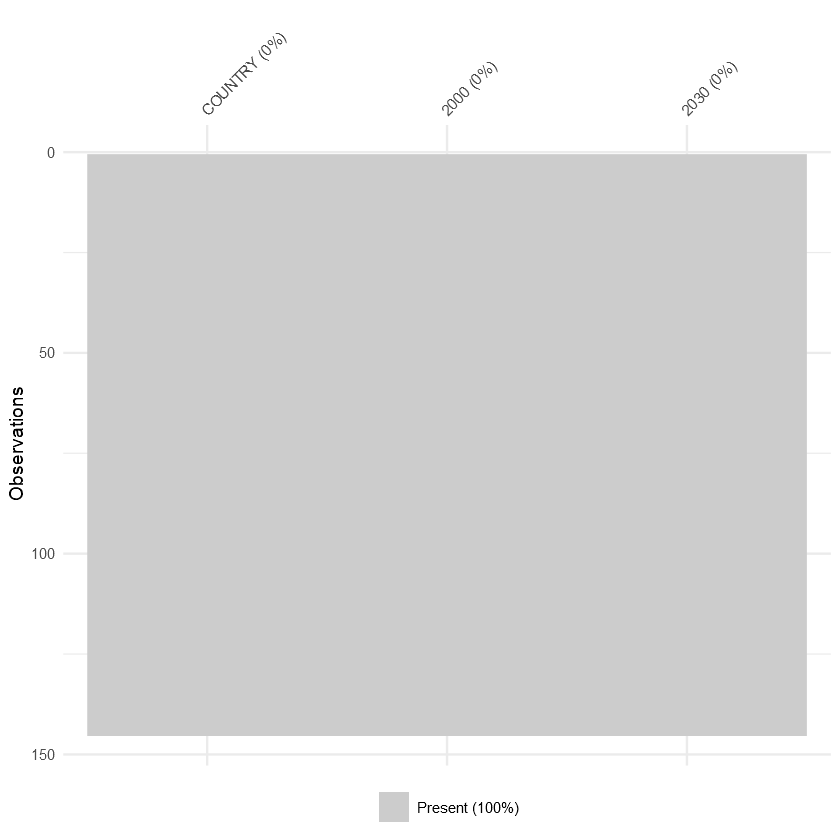

In [31]:
library(visdat)
big_country_df %>% vis_miss(cluster=TRUE)

In [32]:
library(rworldmap)
mapped_data <- joinCountryData2Map(big_country_df , joinCode = "NAME", 
    nameJoinColumn = "COUNTRY")

Loading required package: sp
### Welcome to rworldmap ###
For a short introduction type : 	 vignette('rworldmap')


135 codes from your data successfully matched countries in the map
10 codes from your data failed to match with a country code in the map
108 codes from the map weren't represented in your data


using catMethod='categorical' for non numeric data in mapCountryData


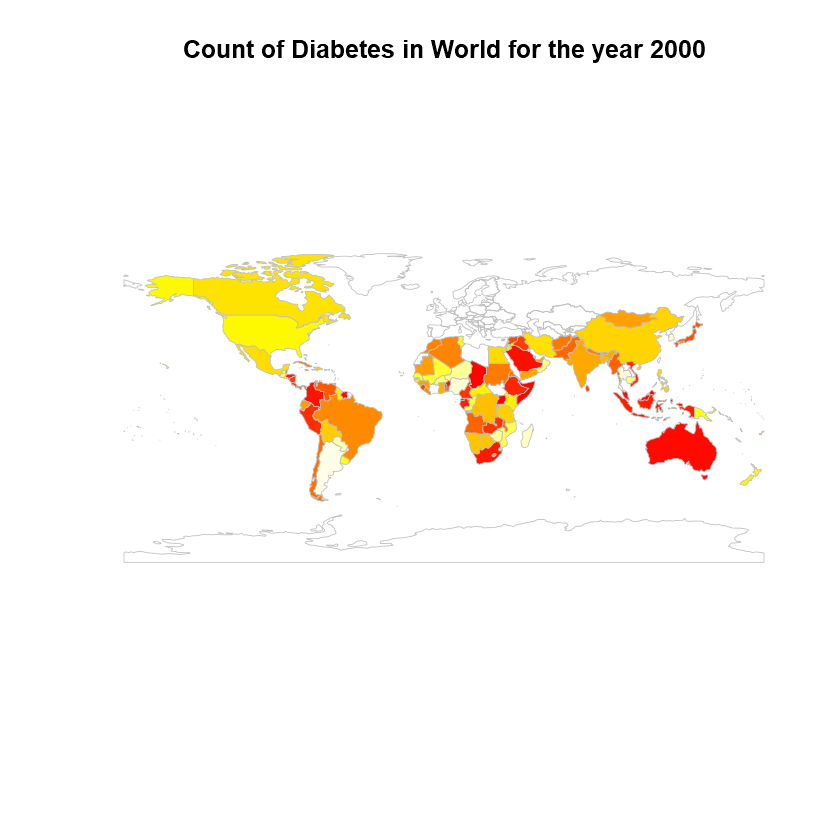

In [33]:
mapCountryData(
    mapped_data, nameColumnToPlot = "2000",
    mapTitle = "Count of Diabetes in World for the year 2000",
    addLegend = "FALSE"
)


using catMethod='categorical' for non numeric data in mapCountryData


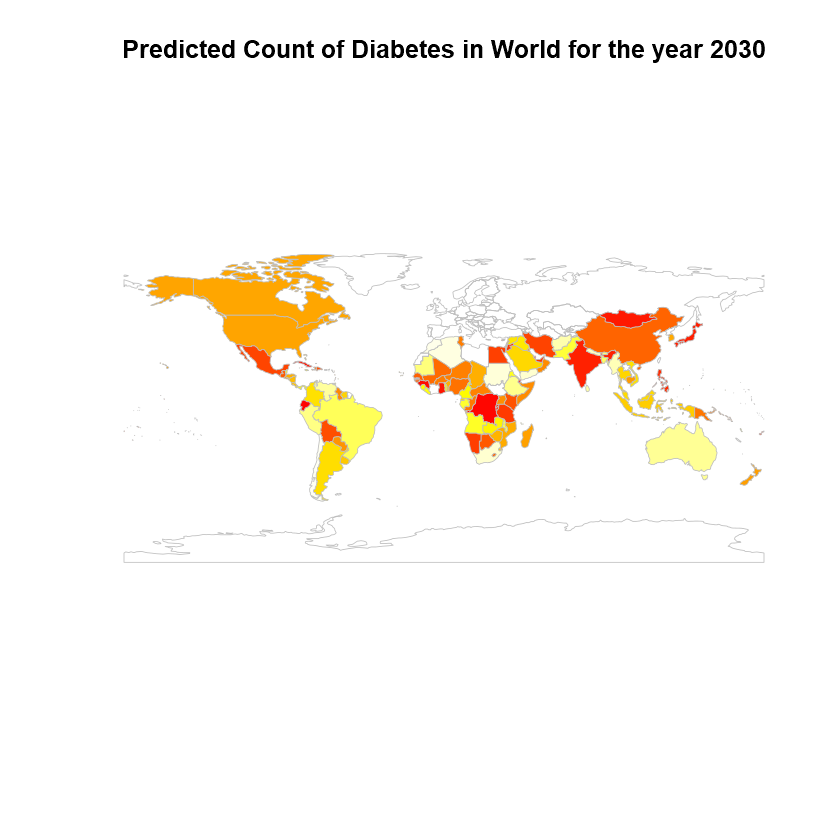

In [62]:
mapCountryData(
    mapped_data, nameColumnToPlot = "2030",
    mapTitle = "Predicted Count of Diabetes in World for the year 2030",
    addLegend = "FALSE"
)


US Mortality

In [35]:
mortality_df <- read.csv("US MORTALITY.csv")

In [36]:
header_true <- function(df) {
  names(df) <- as.character(unlist(df[1,]))
  df[-1,]
}

#Reference: https://stackoverflow.com/questions/32054368/use-first-row-data-as-column-names-in-r?rq=1

In [37]:
mortality_df_2 <- header_true(mortality_df)

In [38]:
mortality_df_2 %>% head(5)

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
2,United States,,"46.20 (44.96, 47.56)","47.35 (46.35, 48.43)","49.11 (48.05, 50.17)","53.58 (52.41, 54.81)","58.01 (56.75, 59.31)","59.04 (57.72, 60.44)","55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
3,Alabama,1,"57.83 (56.10, 59.56)","58.79 (57.48, 60.19)","61.83 (60.38, 63.15)","68.46 (66.81, 70.19)","74.81 (73.11, 76.57)","76.62 (74.79, 78.59)","72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
4,"Autauga County, Alabama",1001,"54.08 (50.06, 58.40)","56.46 (52.61, 60.41)","60.00 (56.64, 63.59)","66.41 (62.87, 70.13)","72.61 (69.17, 76.36)","78.25 (74.33, 82.13)","72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
5,"Baldwin County, Alabama",1003,"46.30 (43.40, 49.00)","44.87 (42.60, 47.33)","46.33 (44.08, 48.61)","50.03 (47.63, 52.60)","52.70 (50.37, 54.97)","51.59 (49.37, 53.96)","50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
6,"Barbour County, Alabama",1005,"64.02 (59.77, 68.43)","63.88 (60.01, 67.75)","64.93 (61.36, 68.17)","70.88 (67.30, 74.81)","77.21 (73.19, 81.46)","77.96 (73.57, 81.98)","73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [39]:
rownames(mortality_df_2) <- 1:nrow(mortality_df_2)

In [40]:
mortality_df_2[3] %>% head(5)

"Mortality Rate, 1980*"
"46.20 (44.96, 47.56)"
"57.83 (56.10, 59.56)"
"54.08 (50.06, 58.40)"
"46.30 (43.40, 49.00)"
"64.02 (59.77, 68.43)"


In [41]:
columns_wanted <- c("Location",	"FIPS", "Mortality Rate, 1980*", "Mortality Rate, 1985*", "Mortality Rate, 1990*",	"Mortality Rate, 1995*",	"Mortality Rate, 2000*",	"Mortality Rate, 2005*",	"Mortality Rate, 2010*",	"Mortality Rate, 2014*",	"% Change in Mortality Rate, 1980-2014")
mortality_df_2 <- mortality_df_2[columns_wanted]

In [42]:
colnames(mortality_df_2) <- c("LOCATION", "FIPS", "MORTALITY_1980",  "MORTALITY_1985", "MORTALITY_1990","MORTALITY_1995", "MORTALITY_2000", "MORTALITY_2005", "MORTALITY_2010", "MORTALITY_2014", "CHANGE")

In [43]:
mortality_df_2 %>% head(5)

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,"46.20 (44.96, 47.56)","47.35 (46.35, 48.43)","49.11 (48.05, 50.17)","53.58 (52.41, 54.81)","58.01 (56.75, 59.31)","59.04 (57.72, 60.44)","55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,"57.83 (56.10, 59.56)","58.79 (57.48, 60.19)","61.83 (60.38, 63.15)","68.46 (66.81, 70.19)","74.81 (73.11, 76.57)","76.62 (74.79, 78.59)","72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,"54.08 (50.06, 58.40)","56.46 (52.61, 60.41)","60.00 (56.64, 63.59)","66.41 (62.87, 70.13)","72.61 (69.17, 76.36)","78.25 (74.33, 82.13)","72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,"46.30 (43.40, 49.00)","44.87 (42.60, 47.33)","46.33 (44.08, 48.61)","50.03 (47.63, 52.60)","52.70 (50.37, 54.97)","51.59 (49.37, 53.96)","50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,"64.02 (59.77, 68.43)","63.88 (60.01, 67.75)","64.93 (61.36, 68.17)","70.88 (67.30, 74.81)","77.21 (73.19, 81.46)","77.96 (73.57, 81.98)","73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [44]:
mortality_df_2$MORTALITY_1980<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_1980)
mortality_df_2 %>% head(5) 

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,"47.35 (46.35, 48.43)","49.11 (48.05, 50.17)","53.58 (52.41, 54.81)","58.01 (56.75, 59.31)","59.04 (57.72, 60.44)","55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,57.83,"58.79 (57.48, 60.19)","61.83 (60.38, 63.15)","68.46 (66.81, 70.19)","74.81 (73.11, 76.57)","76.62 (74.79, 78.59)","72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,"56.46 (52.61, 60.41)","60.00 (56.64, 63.59)","66.41 (62.87, 70.13)","72.61 (69.17, 76.36)","78.25 (74.33, 82.13)","72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,"44.87 (42.60, 47.33)","46.33 (44.08, 48.61)","50.03 (47.63, 52.60)","52.70 (50.37, 54.97)","51.59 (49.37, 53.96)","50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,"63.88 (60.01, 67.75)","64.93 (61.36, 68.17)","70.88 (67.30, 74.81)","77.21 (73.19, 81.46)","77.96 (73.57, 81.98)","73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [45]:
mortality_df_2$MORTALITY_1985<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_1985)
mortality_df_2 %>% head(5) 

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,"49.11 (48.05, 50.17)","53.58 (52.41, 54.81)","58.01 (56.75, 59.31)","59.04 (57.72, 60.44)","55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,57.83,58.79,"61.83 (60.38, 63.15)","68.46 (66.81, 70.19)","74.81 (73.11, 76.57)","76.62 (74.79, 78.59)","72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,56.46,"60.00 (56.64, 63.59)","66.41 (62.87, 70.13)","72.61 (69.17, 76.36)","78.25 (74.33, 82.13)","72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,44.87,"46.33 (44.08, 48.61)","50.03 (47.63, 52.60)","52.70 (50.37, 54.97)","51.59 (49.37, 53.96)","50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,63.88,"64.93 (61.36, 68.17)","70.88 (67.30, 74.81)","77.21 (73.19, 81.46)","77.96 (73.57, 81.98)","73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [46]:
mortality_df_2$MORTALITY_1990<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_1990)
mortality_df_2 %>% head(5) 

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,"53.58 (52.41, 54.81)","58.01 (56.75, 59.31)","59.04 (57.72, 60.44)","55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,57.83,58.79,61.83,"68.46 (66.81, 70.19)","74.81 (73.11, 76.57)","76.62 (74.79, 78.59)","72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,56.46,60.00,"66.41 (62.87, 70.13)","72.61 (69.17, 76.36)","78.25 (74.33, 82.13)","72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,44.87,46.33,"50.03 (47.63, 52.60)","52.70 (50.37, 54.97)","51.59 (49.37, 53.96)","50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,63.88,64.93,"70.88 (67.30, 74.81)","77.21 (73.19, 81.46)","77.96 (73.57, 81.98)","73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [47]:
mortality_df_2$MORTALITY_1995<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_1995)
mortality_df_2 %>% head(5) 

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,53.58,"58.01 (56.75, 59.31)","59.04 (57.72, 60.44)","55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,57.83,58.79,61.83,68.46,"74.81 (73.11, 76.57)","76.62 (74.79, 78.59)","72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,"72.61 (69.17, 76.36)","78.25 (74.33, 82.13)","72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,"52.70 (50.37, 54.97)","51.59 (49.37, 53.96)","50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,"77.21 (73.19, 81.46)","77.96 (73.57, 81.98)","73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [48]:
mortality_df_2$MORTALITY_2000<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_2000)
mortality_df_2 %>% head(5) 

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,53.58,58.01,"59.04 (57.72, 60.44)","55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,57.83,58.79,61.83,68.46,74.81,"76.62 (74.79, 78.59)","72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,72.61,"78.25 (74.33, 82.13)","72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,52.70,"51.59 (49.37, 53.96)","50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,77.21,"77.96 (73.57, 81.98)","73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [49]:
mortality_df_2$MORTALITY_2005<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_2005)
mortality_df_2 %>% head(5) 

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,53.58,58.01,59.04,"55.70 (54.34, 57.00)","55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,57.83,58.79,61.83,68.46,74.81,76.62,"72.34 (70.54, 74.13)","70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,72.61,78.25,"72.46 (68.53, 76.45)","74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,52.70,51.59,"50.44 (48.16, 52.89)","49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,77.21,77.96,"73.12 (68.81, 77.37)","72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [50]:
mortality_df_2$MORTALITY_2010<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_2010)
mortality_df_2 %>% head(5) 

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,53.58,58.01,59.04,55.70,"55.89 (54.35, 57.36)","20.98 (16.87, 24.94)"
Alabama,1,57.83,58.79,61.83,68.46,74.81,76.62,72.34,"70.81 (68.84, 72.75)","22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,72.61,78.25,72.46,"74.98 (70.81, 79.32)","38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,52.70,51.59,50.44,"49.57 (47.22, 52.04)","7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,77.21,77.96,73.12,"72.73 (68.41, 77.24)","13.60 (3.89, 24.82)"


In [51]:
mortality_df_2$MORTALITY_2014<- sub("\\s*\\(.*", "", mortality_df_2$MORTALITY_2014)
mortality_df_2 %>% head(5) 

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,53.58,58.01,59.04,55.70,55.89,"20.98 (16.87, 24.94)"
Alabama,1,57.83,58.79,61.83,68.46,74.81,76.62,72.34,70.81,"22.44 (18.10, 26.86)"
"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,72.61,78.25,72.46,74.98,"38.63 (25.60, 52.24)"
"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,52.70,51.59,50.44,49.57,"7.06 (-0.48, 16.32)"
"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,77.21,77.96,73.12,72.73,"13.60 (3.89, 24.82)"


In [52]:
mortality_df_2$CHANGE<- sub("\\s*\\(.*", "", mortality_df_2$CHANGE)
mortality_df_2 %>% head(5) 

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,53.58,58.01,59.04,55.70,55.89,20.98
Alabama,1,57.83,58.79,61.83,68.46,74.81,76.62,72.34,70.81,22.44
"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,72.61,78.25,72.46,74.98,38.63
"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,52.70,51.59,50.44,49.57,7.06
"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,77.21,77.96,73.12,72.73,13.60


In [53]:
us_mortality_df <- mortality_df_2[1,]

In [54]:
us_mortality_df

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
United States,,46.20,47.35,49.11,53.58,58.01,59.04,55.70,55.89,20.98


In [55]:
us_mortality_df <- mortality_df_2[-c(1),]


In [56]:
us_mortality_df %>% head(5)

,LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
2,Alabama,1,57.83,58.79,61.83,68.46,74.81,76.62,72.34,70.81,22.44
3,"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,72.61,78.25,72.46,74.98,38.63
4,"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,52.70,51.59,50.44,49.57,7.06
5,"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,77.21,77.96,73.12,72.73,13.60
6,"Bibb County, Alabama",1007,72.25,75.01,75.41,81.95,88.83,88.44,82.71,79.76,10.39


In [57]:
rownames(us_mortality_df) <- us_mortality_df$Alabama

In [58]:
us_mortality_df %>% tail(5)

,LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
3191,"Uinta County, Wyoming",56041,36.23,37.42,40.53,45.96,51.99,55.25,53.54,55.84,54.13
3192,"Washakie County, Wyoming",56043,40.36,41.86,43.32,48.73,54.20,56.71,52.51,54.20,34.31
3193,"Weston County, Wyoming",56045,40.56,39.90,39.63,43.23,46.51,48.20,44.14,45.12,11.25
3194,,,,,,,,,,,
3195,"*Age-standardized mortality rate for both sexes combined (deaths per 100,000 population). Numbers in parentheses are 95% uncertainty intervals.",,,,,,,,,,


In [59]:
final_us_df <- head(us_mortality_df, -2)

In [60]:
final_us_df %>% tail(5) # last 2 rows removed

,LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
3189,"Sweetwater County, Wyoming",56037,36.47,37.32,39.23,43.54,47.78,50.12,47.53,50.38,38.14
3190,"Teton County, Wyoming",56039,33.01,32.54,31.61,32.27,33.52,31.73,28.90,27.66,-16.20
3191,"Uinta County, Wyoming",56041,36.23,37.42,40.53,45.96,51.99,55.25,53.54,55.84,54.13
3192,"Washakie County, Wyoming",56043,40.36,41.86,43.32,48.73,54.20,56.71,52.51,54.20,34.31
3193,"Weston County, Wyoming",56045,40.56,39.90,39.63,43.23,46.51,48.20,44.14,45.12,11.25


In [61]:
final_us_df %>% head(5)

LOCATION,FIPS,MORTALITY_1980,MORTALITY_1985,MORTALITY_1990,MORTALITY_1995,MORTALITY_2000,MORTALITY_2005,MORTALITY_2010,MORTALITY_2014,CHANGE
Alabama,1,57.83,58.79,61.83,68.46,74.81,76.62,72.34,70.81,22.44
"Autauga County, Alabama",1001,54.08,56.46,60.00,66.41,72.61,78.25,72.46,74.98,38.63
"Baldwin County, Alabama",1003,46.30,44.87,46.33,50.03,52.70,51.59,50.44,49.57,7.06
"Barbour County, Alabama",1005,64.02,63.88,64.93,70.88,77.21,77.96,73.12,72.73,13.60
"Bibb County, Alabama",1007,72.25,75.01,75.41,81.95,88.83,88.44,82.71,79.76,10.39


In [67]:
final_us_df %>% glimpse()

Observations: 3,193
Variables: 11
$ LOCATION       <fct> Alabama, Autauga County, Alabama, Baldwin County, Al...
$ FIPS           <fct> 1, 1001, 1003, 1005, 1007, 1009, 1011, 1013, 1015, 1...
$ MORTALITY_1980 <chr> "57.83", "54.08", "46.30", "64.02", "72.25", "47.44"...
$ MORTALITY_1985 <chr> "58.79", "56.46", "44.87", "63.88", "75.01", "47.08"...
$ MORTALITY_1990 <chr> "61.83", "60.00", "46.33", "64.93", "75.41", "48.28"...
$ MORTALITY_1995 <chr> "68.46", "66.41", "50.03", "70.88", "81.95", "54.50"...
$ MORTALITY_2000 <chr> "74.81", "72.61", "52.70", "77.21", "88.83", "60.21"...
$ MORTALITY_2005 <chr> "76.62", "78.25", "51.59", "77.96", "88.44", "63.60"...
$ MORTALITY_2010 <chr> "72.34", "72.46", "50.44", "73.12", "82.71", "58.38"...
$ MORTALITY_2014 <chr> "70.81", "74.98", "49.57", "72.73", "79.76", "58.72"...
$ CHANGE         <chr> "22.44", "38.63", "7.06", "13.60", "10.39", "23.78",...


In [69]:
final_us_df[, 'FIPS'] <- sapply(final_us_df[, 'FIPS'], as.character)

In [70]:
final_us_df %>% glimpse()

Observations: 3,193
Variables: 11
$ LOCATION       <fct> Alabama, Autauga County, Alabama, Baldwin County, Al...
$ FIPS           <chr> "1", "1001", "1003", "1005", "1007", "1009", "1011",...
$ MORTALITY_1980 <chr> "57.83", "54.08", "46.30", "64.02", "72.25", "47.44"...
$ MORTALITY_1985 <chr> "58.79", "56.46", "44.87", "63.88", "75.01", "47.08"...
$ MORTALITY_1990 <chr> "61.83", "60.00", "46.33", "64.93", "75.41", "48.28"...
$ MORTALITY_1995 <chr> "68.46", "66.41", "50.03", "70.88", "81.95", "54.50"...
$ MORTALITY_2000 <chr> "74.81", "72.61", "52.70", "77.21", "88.83", "60.21"...
$ MORTALITY_2005 <chr> "76.62", "78.25", "51.59", "77.96", "88.44", "63.60"...
$ MORTALITY_2010 <chr> "72.34", "72.46", "50.44", "73.12", "82.71", "58.38"...
$ MORTALITY_2014 <chr> "70.81", "74.98", "49.57", "72.73", "79.76", "58.72"...
$ CHANGE         <chr> "22.44", "38.63", "7.06", "13.60", "10.39", "23.78",...


In [76]:
df_us_new %>% glimpse()

Observations: 3,193
Variables: 2
$ region <chr> "1", "1001", "1003", "1005", "1007", "1009", "1011", "1013",...
$ value  <dbl> 57.83, 54.08, 46.30, 64.02, 72.25, 47.44, 73.59, 54.58, 51.6...


Warning message in super$initialize(map.df, user.df):
"Your data.frame contains the following regions which are not mappable: 1, 2, 2158, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 46102, 47, 48, 49, 50, 51, 53, 54, 55, 56"Warning message in self$bind():
"The following regions were missing and are being set to NA: 46113, 51515, 2270"

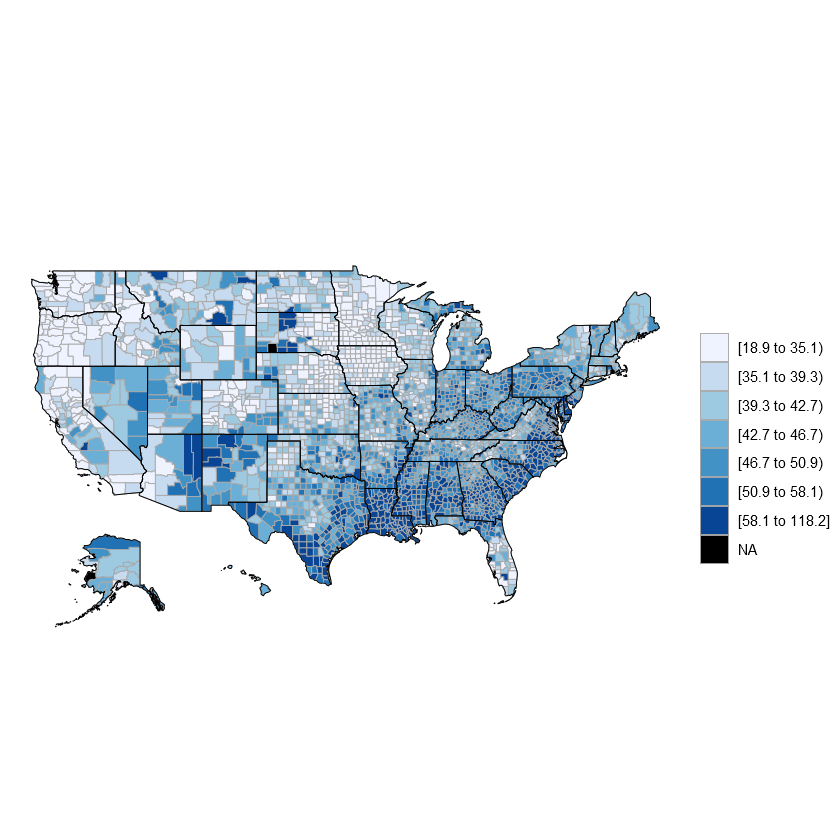

In [77]:
#Reference: https://www.gislounge.com/mapping-county-demographic-data-in-r/
library(choroplethr)
library(choroplethrMaps)
df_us_new <- final_us_df %>% select(FIPS, MORTALITY_1980)
df_us_new[, "MORTALITY_1980"] <- sapply(df_us_new[, "MORTALITY_1980"], as.numeric)
df_us_new[, "FIPS"] <- sapply(df_us_new[, "FIPS"], as.numeric)
columns_wanted <- c("FIPS", "MORTALITY_1980")
colnames(df_us_new) <- c("region", "value")
county_choropleth(df_us_new)

Warning message in super$initialize(map.df, user.df):
"Your data.frame contains the following regions which are not mappable: 1, 2, 2158, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 46102, 47, 48, 49, 50, 51, 53, 54, 55, 56"Warning message in self$bind():
"The following regions were missing and are being set to NA: 46113, 51515, 2270"

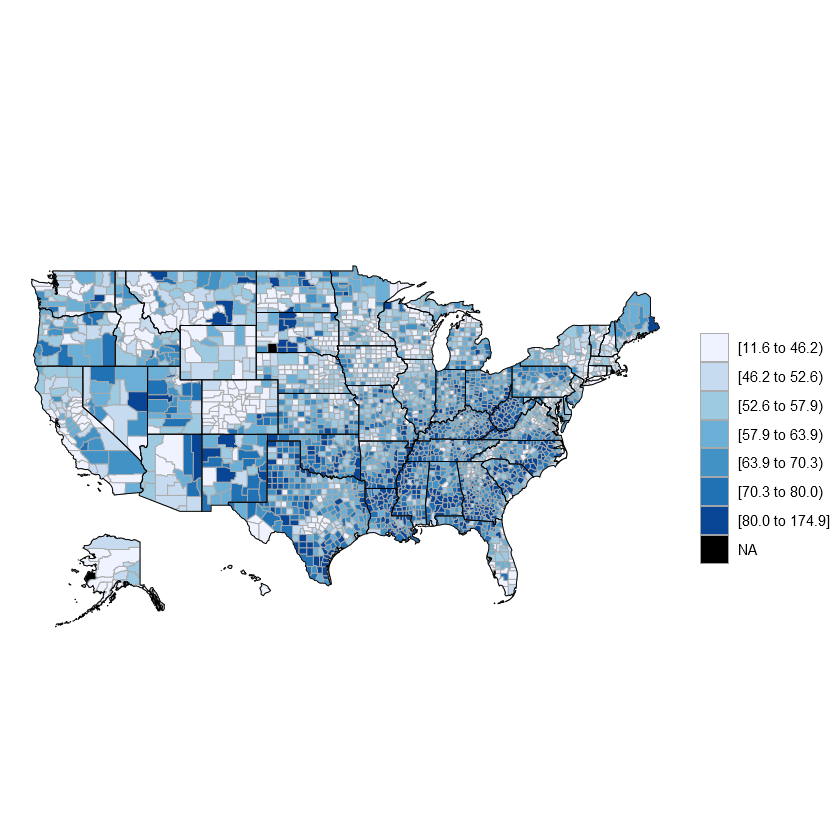

In [78]:
df_us_new_2 <- final_us_df %>% select(FIPS, MORTALITY_2014)
df_us_new_2[, "MORTALITY_2014"] <- sapply(df_us_new_2[, "MORTALITY_2014"], as.numeric)
df_us_new_2[, "FIPS"] <- sapply(df_us_new_2[, "FIPS"], as.numeric)
columns_wanted <- c("FIPS", "MORTALITY_2014")
colnames(df_us_new_2) <- c("region", "value")
county_choropleth(df_us_new_2)